In [1]:
class solution:
    def __init__(self):
        self.best = 0
        self.bestIndividual=[]
        self.convergence = []
        self.optimizer=""
        self.objfname=""
        self.startTime=0
        self.endTime=0
        self.executionTime=0
        self.lb=0
        self.ub=0
        self.dim=0
        self.popnum=0
        self.maxiers=0
        self.no_of_iterations=0

In [2]:
def dis(z,c):
    sum=0
    for i in range(len(z)):
        sum=sum+(z[i]-c[i])**2
    return sum

In [3]:
def assign_cluster_label(data, centers):
    cluster_labels = []
    for point in data:
        # compute distances between three cluster centers to a data point
        distances = [dis(point, center) for center in centers]
        # find which cluster is closest to the data point and assign the cluster  it
        cluster_labels.append(distances.index(min(distances)))
    return cluster_labels

In [4]:
def gen_wolf(n_cluster,dim):
    graywolf=[]
    for j in range(n_cluster):
        c=[]
        for i in range(dim):
            ub=x[i].max()
            lb=x[i].min()
            c.append(np.random.uniform(0,1) *(ub-lb)+lb)
        graywolf.append(c)
    return np.array(graywolf)

In [5]:
def init_pop(n_pop,n_cluster,dim):
    init_pop=[]
    for i in range (n_pop):
        #index = np.random.choice(list(range(len(x))), 3)
        z=gen_wolf(n_cluster,dim)
        
        init_pop.append(np.array(z))
    return np.array(init_pop)

In [6]:
from math import sqrt
def dist_f(z,c):

    sum=0
    for i in range(len(z)):
        sum=sum+(z[i]-c[i])**2
    return sqrt(sum)

In [7]:
def fitness(data,Positions,current_labels,i):
    #fitnesses=[]
    
    #for i in range(len(gw)):
        
    bank=0
    for j in range(len(Positions[i])):
        for k in range(len(current_labels)):
                
            if current_labels[k]==j:
                bank =bank + dist_f(data[k],Positions[i][j])
        #fitnesses.append(bank)
        
    return bank

In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets
yash = pd.read_csv ('dataset/braintumor/bt_dataset_t3.csv')
x= pd.DataFrame(yash  ).values 
 
#x= pd.DataFrame(yash ).values
 
 

In [9]:
x=x[:,1:18]

In [10]:
x

array([[23.448516845703125, 2538.9856272310794, 50.388348129613064, ...,
        0.7770110697231628, 0.17116319444444444, 0.3039887045534769],
       [4.3983306884765625, 834.8530300098457, 28.893823388569498, ...,
        0.9779527874393928, 0.009913194444444443, 0.8390188892021426],
       [3.2442626953125, 642.0591664836393, 25.33888644916424, ...,
        0.9853620242280676, 0.006371527777777778, 0.849774866966844],
       ...,
       [1.82818603515625, 230.1076838108856, 15.169300702764303, ...,
        0.9647710898879338, 0.016284722222222218, 0.0],
       [0.0616302490234375, 8.029570498868452, 2.8336496782186136, ...,
        0.9983158211528944, 0.0005381944444444443, 0.0],
       [0.718505859375, 91.46057175868192, 9.563502065597199, ...,
        0.9859882997725176, 0.006388888888888889, 0.0]], dtype=object)

In [11]:
import random
import numpy
import math
#from solution import solution
import time


    

def GWO(Max_iter,SearchAgents_no,n_cluster,dim):
    
   
    ggnn=0
    data=np.array(x)

    levy=np.zeros(SearchAgents_no)
    
    # initialize alpha, beta, and delta_pos
    Alpha_pos=np.zeros((n_cluster,dim))
    Alpha_score=float("inf")
    
    Beta_pos=np.zeros((n_cluster,dim))
    Beta_score=float("inf")
    
    Delta_pos=np.zeros((n_cluster,dim))
    Delta_score=float("inf")
    
    #Initialize the positions of search agents
    Positions=init_pop(SearchAgents_no,n_cluster,dim)
    
    Convergence_curve=numpy.zeros(Max_iter)
    sol=solution()

    # Loop counter
    #print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    timerStart=time.time() 
    sol.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    
    
    #sol=solution()

    # Loop counter
    #print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    #timerStart=time.time() 
    #sol.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    # Main loop
    for l in range(0,Max_iter):
        for i in range(0,SearchAgents_no):
            
            # Return back the search agents that go beyond the boundaries of the search space
            #Positions[i,:]=numpy.clip(Positions[i,:], lb, ub)

            # Calculate objective function for each search agent
            
            current_centers=pd.DataFrame(Positions[i])
            current_labels = assign_cluster_label(data,Positions[i])
            current_centers.columns=[ 'a','b','c','d','e','f','g','h','i','j','t','l','m','n','o','p','q',]
             

            fitness1=fitness(data,Positions,current_labels,i)
            
            # Update Alpha, Beta, and Delta
            if fitness1<Alpha_score :
                Alpha_score=fitness1; # Update alpha
                Alpha_pos=Positions[i,:].copy()
            
            
            if (fitness1>Alpha_score and fitness1<Beta_score ):
                Beta_score=fitness1  # Update beta
                Beta_pos=Positions[i,:].copy()
            
            
            if (fitness1>Alpha_score and fitness1>Beta_score and fitness1<Delta_score): 
                Delta_score=fitness1 # Update delta
                Delta_pos=Positions[i,:].copy()
            
        
        #z=numpy.random.uniform()
        #z=4*z*(1-z)
        
        
        a=2-l*((2)/Max_iter); # a decreases linearly fron 2 to 0
        
        beta=0.5
        sigma=(math.gamma(1+beta)*math.sin(math.pi*beta/2)/(math.gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta);
        
        for i in range(0,SearchAgents_no):
            for j in range (0,n_cluster):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); # Equation (3.5)-part 1
                X1=Alpha_pos[j]-A1*D_alpha; # Equation (3.6)-part 1
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); # Equation (3.5)-part 2
                X2=Beta_pos[j]-A2*D_beta; # Equation (3.6)-part 2
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); # Equation (3.5)-part 3
                X3=Delta_pos[j]-A3*D_delta; # Equation (3.5)-part 3             
                
                Positions[i,j]=(X1+X2+X3)/3  # Equation (3.7)
            
            s=Positions[i,:]
            
            u=numpy.random.uniform(size=dim)*sigma
            v=numpy.random.uniform(size=dim)
            step=u*abs(v)**(1/beta)
            stepsize=0.1*step*(s-Alpha_pos) #s-alpha_pos
            s=s+stepsize*numpy.random.uniform(size=dim)
            Positions[i]=s
        Convergence_curve[l]=Alpha_score

    timerEnd=time.time()  
    sol.endTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    sol.executionTime=timerEnd-timerStart
    sol.convergence=Convergence_curve
    sol.optimizer="GWO"
    
    sol.no_of_iterations=l  
    print(Alpha_pos)
    return Alpha_pos,current_labels,sol

In [42]:
egwo=GWO(Max_iter=100,SearchAgents_no=20,n_cluster=3,dim=17)

In [13]:
current_centers=pd.DataFrame(egwo[0])

In [18]:
current_centers.columns=['a','b','c','d','e','f','g','h','i','j','t','l','m','n','o','p','q', ]

In [19]:
current_labels=egwo[1]

In [20]:
data=np.array(x)
data_df = pd.DataFrame(data)
data_df.columns=['a','b','c','d','e','f','g','h','i','j','t','l','m','n','o','p','q',]

Text(0.5, 0, 'y')

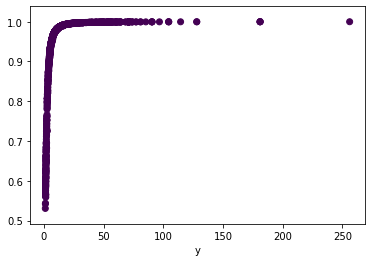

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x='e',y='d',c=current_labels,data=data_df)
#plt.scatter(x='z',y='k',data=current_centers,c=['purple','blue','yellow'],marker='*', s=200)
 
plt.xlabel("x")
plt.xlabel("y")

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x='x',y='k', c=current_labels,data=data_df)
#plt.scatter(x='z',y='k',data=current_centers,c=['purple','blue','yellow'],marker='*', s=200)
plt.savefig("enhanced_F2.png")
plt.xlabel("x")
plt.xlabel("y")

In [ ]:
x1=[]
for i in range(100):
    x1.append(i)

In [ ]:
plt.plot(x1,egwo[2].convergence,color="blue")
plt.xlabel("No. of iterations")
plt.ylabel("Fitness")
plt.savefig("enhanced_F1.png")
plt.show()

https://www.kaggle.com/yusufdede/lung-cancer-dataset
https://www.kaggle.com/rishidamarla/cancer-patients-data/discussion/203444
https://www.kaggle.com/rishidamarla/cancer-statistics-in-us-states